intégré dans android studio avec le projet  testdetectionobject6pommeaugmenter

**Avec réentrainement**

sa précision est boff sa marche genre 2 fois sur 3 memme si c ecrit 0.90 de précision. A revoir. faite avec les image préselectionner qui fonctionnait bien 

Pt lier au fait qu'il y avat une erreur de racine pour detecter le dossier train sur google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

MessageError: ignored

In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-02-20 20:51:35--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  51.9MB/s    in 1.9s    

2023-02-20 20:51:40 (51.9 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


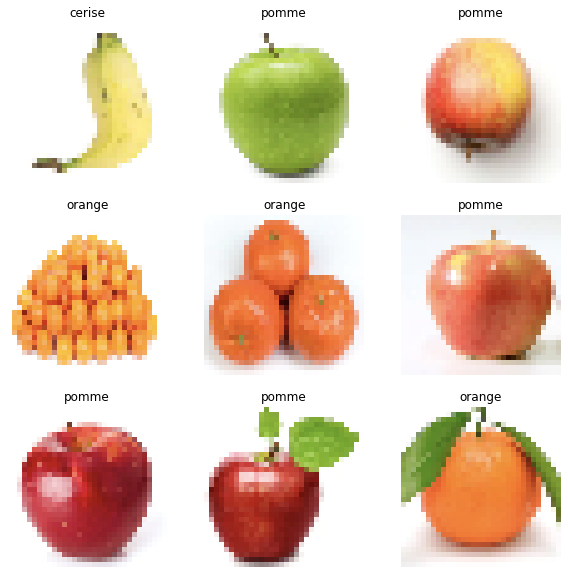

In [ ]:
class_names = ["pomme", "cerise", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs=20  #etait a 10
hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/20
23/23 [==============================] - 10s 187ms/step - loss: 1.0421 - accuracy: 0.5196 - val_loss: 0.8837 - val_accuracy: 0.6970
Epoch 2/20
23/23 [==============================] - 2s 80ms/step - loss: 0.6982 - accuracy: 0.7087 - val_loss: 0.6661 - val_accuracy: 0.6212
Epoch 3/20
23/23 [==============================] - 2s 80ms/step - loss: 0.3953 - accuracy: 0.8543 - val_loss: 0.3623 - val_accuracy: 0.7879
Epoch 4/20
23/23 [==============================] - 2s 77ms/step - loss: 0.2620 - accuracy: 0.9000 - val_loss: 0.4363 - val_accuracy: 0.8485
Epoch 5/20
23/23 [==============================] - 4s 137ms/step - loss: 0.1787 - accuracy: 0.9304 - val_loss: 0.1319 - val_accuracy: 0.9545
Epoch 6/20
23/23 [==============================] - 3s 80ms/step - loss: 0.1293 - accuracy: 0.9587 - val_loss: 0.1694 - val_accuracy: 0.9242
Epoch 7/20
23/23 [==============================] - 2s 78ms/step - loss: 0.1268 - accuracy: 0.9630 - val_loss: 0.1447 - val_accuracy: 0.9242
Epoch 8/20

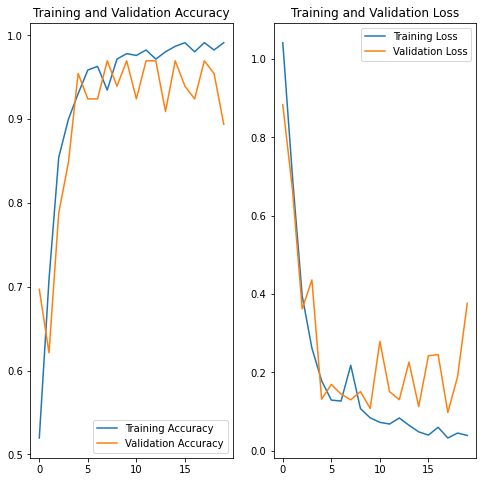

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Augmentation des données**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)



Visualisons à quoi ressemblent quelques exemples augmentés en appliquant plusieurs fois l'augmentation de données à la même image :


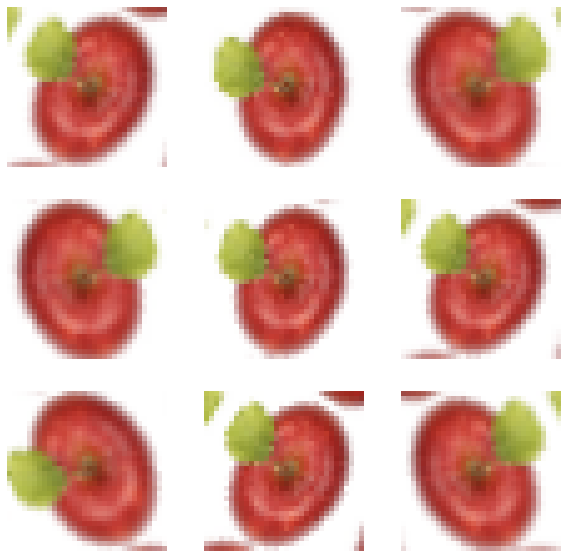

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Abandonner**

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque vous appliquez une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.

Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées :


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compiler et entraîner le modèle**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [ ]:
epochs = 20  #etait a 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


23/23 [==============================] - 7s 99ms/step - loss: 0.9379 - accuracy: 0.5652 - val_loss: 0.6212 - val_accuracy: 0.7121
Epoch 2/20
23/23 [==============================] - 4s 143ms/step - loss: 0.5210 - accuracy: 0.7957 - val_loss: 0.4861 - val_accuracy: 0.6970
Epoch 3/20
23/23 [==============================] - 4s 105ms/step - loss: 0.3378 - accuracy: 0.8652 - val_loss: 0.3700 - val_accuracy: 0.8485
Epoch 4/20
23/23 [==============================] - 3s 89ms/step - loss: 0.2071 - accuracy: 0.9261 - val_loss: 0.2231 - val_accuracy: 0.9242
Epoch 5/20
23/23 [==============================] - 3s 90ms/step - loss: 0.2145 - accuracy: 0.9304 - val_loss: 0.3646 - val_accuracy: 0.8788
Epoch 6/20
23/23 [==============================] - 4s 147ms/step - loss: 0.1565 - accuracy: 0.9500 - val_loss: 0.1339 - val_accuracy: 0.9545
Epoch 7/20
23/23 [==============================] - 3s 95ms/step - loss: 0.1438 - accuracy: 0.9522 - val_loss: 0.1053 - val_accuracy: 0.9394
Epoch 8/20
23/23 [===

**Visualisez les résultats de l'entraînement**

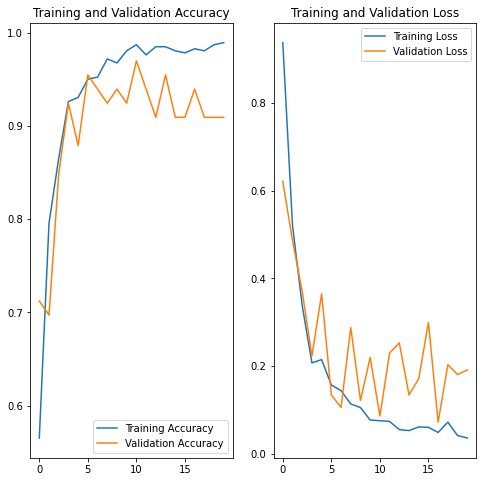

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 16ms/step - loss: 0.1519 - accuracy: 0.9615


[0.15191757678985596, 0.9615384340286255]

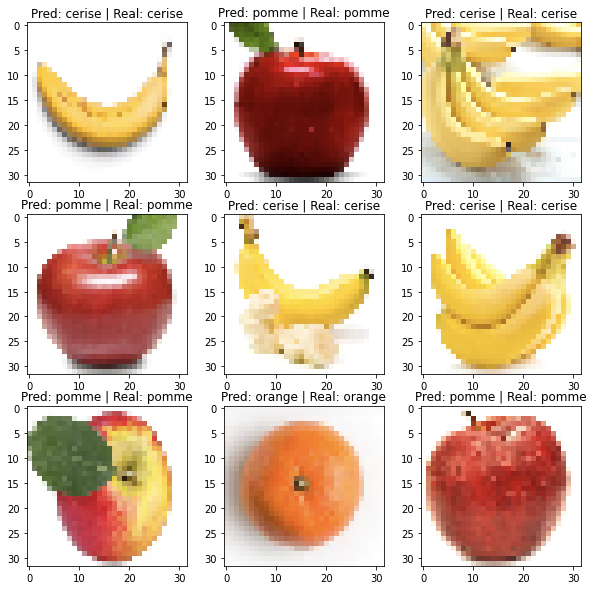

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPommeOrangeAugmenter.tflite", 'wb') as f:
  f.write(tflite_model)